<a href="https://colab.research.google.com/github/kdw9687/CapstonePBL_Predict_Movie/blob/main/ANN(4%EA%B0%80%EC%A7%80)_%2B_sigmoid_%2B_radam_%2B_%ED%95%99%EC%8A%B5%EB%A5%A0_%EA%B0%90%EC%86%8C___Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title 
!pip install -q keras-bert keras-rectified-adam
!wget -q https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip -o uncased_L-12_H-768_A-12.zip
!pip install -U keras-tuner
!pip install -q -U tensorflow-addons

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  
     |████████████████████████████████| 102kB 5.9MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=9ca113afdee6dc13a2735ec8bdc3dec7047a383c6936a4eeb70d178155dd0b6e
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy
     |████████████████████████████████| 686kB 7.7MB/s 


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten,Activation
from tensorflow.keras.utils import to_categorical
drive.mount('/content/drive')
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import sys
import numpy as np
from sklearn import preprocessing
from keras_radam import RAdam
np.set_printoptions(threshold=sys.maxsize)

Mounted at /content/drive


In [3]:
def Mish(x):
  return x * K.tanh(K.softplus(x))

In [4]:
file='/content/drive/MyDrive/Colab Notebooks/데이터 판다스용완.csv'

In [5]:
data=pd.read_csv(file)

In [6]:
data=data.dropna()

In [7]:
data.drop(columns=['순번','장르','국적.1','연휴 및 기념일 상영 여부','수상'],inplace=True)
data.set_index('영화명',inplace=True)
target=data['전국 관객수']
target.dropna(inplace=True)
x=data.drop(columns=['전국 매출액','전국 관객수'])
y=target

In [8]:
scaler=preprocessing.StandardScaler()
features_to_scale=['전국 스크린수','러닝타임','네티즌 평점']
scale=scaler.fit_transform(data[features_to_scale])
x[features_to_scale]=scale

In [9]:
for i in range(len(y)):
  if y[i]>6000000:
    y[i]=3
  elif y[i]>3000000 and y[i]<=6000000:
    y[i]=2
  elif y[i]>1000000 and y[i]<=3000000:
    y[i]=1
  else:
    y[i]=0
  x=np.array(x)
  y=np.array(y)

In [10]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=5)

In [11]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

In [12]:
inputs=Input(shape=(36,))
x=Flatten()(inputs)
x=Dense(800)(x)
x=Activation('sigmoid')(x)
x=Dense(400)(x)
x=Activation('sigmoid')(x)
x=Dense(4,activation='softmax')(x)
model=Model(inputs=inputs,outputs=x)

In [13]:
model.compile(optimizer=RAdam(learning_rate=tf.compat.v1.train.exponential_decay(0.001,
0,5, 0.95,staircase=True)),loss='categorical_crossentropy',metrics=['acc'])

In [14]:
history=model.fit(x_train,y_train,epochs=100,batch_size=40,validation_data=(x_val,y_val))

Epoch 1/100
20/20 [==============================] - 4s 12ms/step - loss: 1.6712 - acc: 0.3275 - val_loss: 1.1407 - val_acc: 0.5250
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1898 - acc: 0.4775 - val_loss: 1.0508 - val_acc: 0.5250
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1551 - acc: 0.4762 - val_loss: 1.0319 - val_acc: 0.5250
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1281 - acc: 0.4775 - val_loss: 1.0248 - val_acc: 0.5250
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.1078 - acc: 0.4775 - val_loss: 0.9984 - val_acc: 0.5250
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0922 - acc: 0.5038 - val_loss: 1.0155 - val_acc: 0.5250
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0644 - acc: 0.4900 - val_loss: 0.9795 - val_acc: 0.5500
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0506 - 

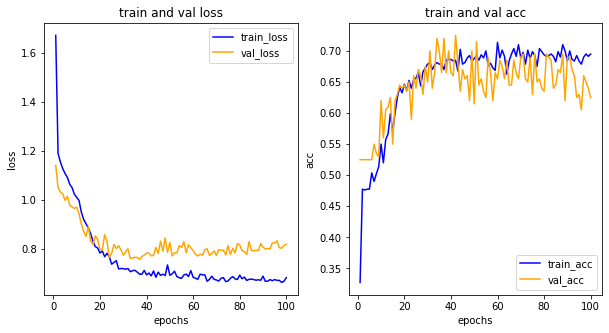

In [15]:
import matplotlib.pyplot as plt
his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']
epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

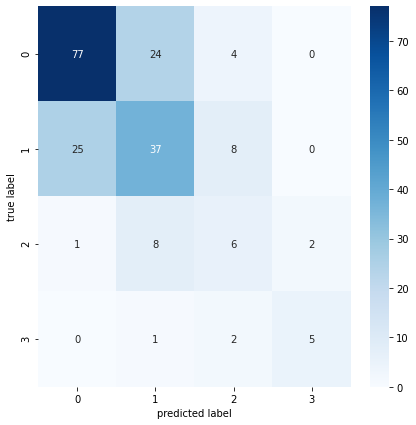

In [16]:
results=model.predict(x_val)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

plt.figure(figsize=(7,7))
cm=confusion_matrix(np.argmax(y_val,axis=-1),np.argmax(results,axis=-1))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [17]:
print('\n',classification_report(np.argmax(y_val,axis=-1),np.argmax(results,axis=-1)))


               precision    recall  f1-score   support

           0       0.75      0.73      0.74       105
           1       0.53      0.53      0.53        70
           2       0.30      0.35      0.32        17
           3       0.71      0.62      0.67         8

    accuracy                           0.62       200
   macro avg       0.57      0.56      0.56       200
weighted avg       0.63      0.62      0.63       200



In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 800)               29600     
_________________________________________________________________
activation (Activation)      (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
activation_1 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1604  